# Pixel classification project




## Introduction

In this project I intend to produce a classification model based on data I have labeled  and its ultimate goal is to be applied on hyperspectral images:

My dataset contains **Xxxxx** samples where each sample (=row) contains values ​​of 204 different pixel wavelengths in hyperspectral images of a vertical green wall. The wall contains six different species and from each image I collected hundreds of pixels that I labeled according to the plant species. I actually have 204 features (= columns) and what I want to predict using them is the plant species (labels).
 


 After creating a classification model at a sufficient performance, I would be able to run the model on all the images I have and predict for each pixel which species it represents.

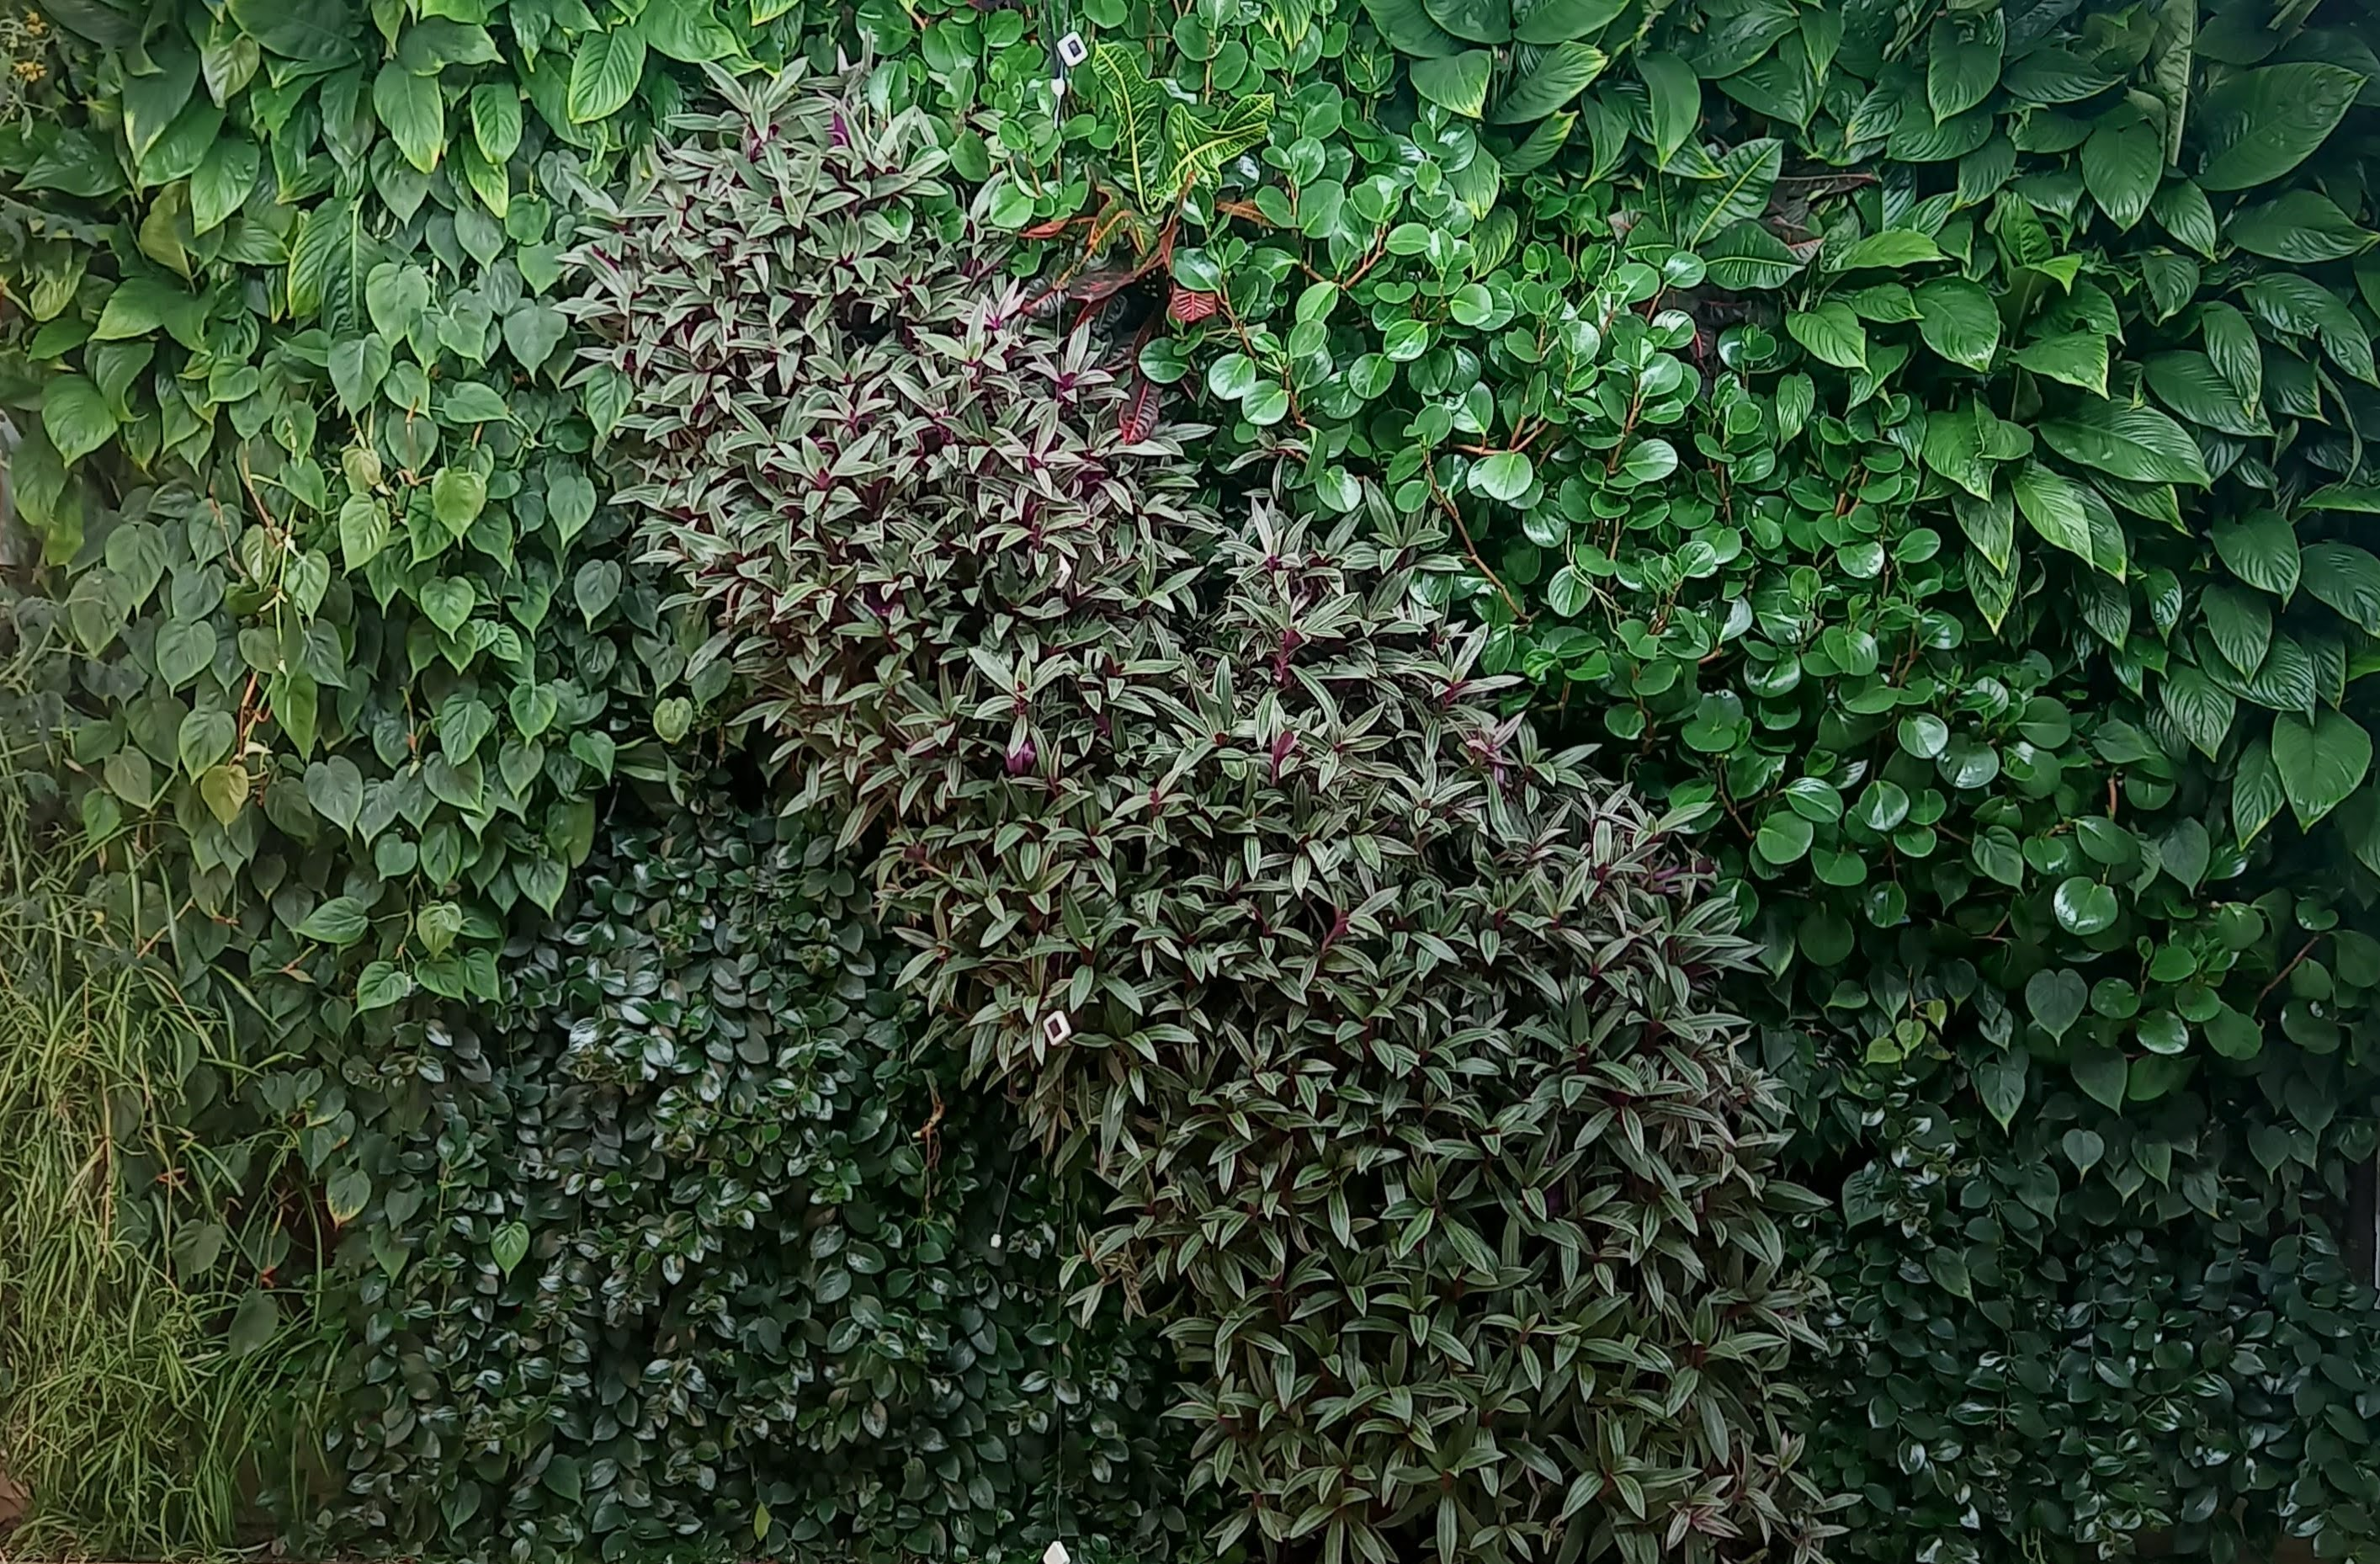

### Project stages

1. Read the several files of data and merge them into one file.

2. Preprocessing and Visualization

3. Build the models and evalute

4. Apply the model on new images

**I this part of the project I will perform steps 1-3**

## 1. Read the several files of data and merge them into one file.

Import all packages

In [ ]:
import glob #files arrangments and import from folders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette =["deeppink","lime","Orange","red","forestgreen","cyan"]
sns.set_theme(style="white",font_scale = 1.5, palette=palette)
# Set the font to Times new roman
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score
!pip install torchinfo
from torchinfo import summary
!pip install bioinfokit
from bioinfokit.visuz import cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 1.5 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.9-py3-none-any.whl size=57887 sha256=8b6f286e2153dbc68984bd9ceb9596c47ee0148f74dcf9529858a4ca616e68ec
  Stored in directory: /root/.cache/pip/wheels/b0/fb/06/d3a53ac68725153b8a396e1883a9c38ceddea97ea7db4cb083
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=0c6314cb1418dd537457fe14329b1afe37b42da74b6cb52aa47e4ab24a2cfb7e
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


My files are stored in such a way that every file is a measurement from a different date, so I want to combine them all into one file. In my case the relevant information is on the **second sheet** in each file. I want to take only him.

In [ ]:
# data = pd.DataFrame()
# path_to_folder = "/content/drive/MyDrive/Greenwall/Hyperspectral_data/"
# for file_name in glob.glob(path_to_folder+'*.xlsx'):
#   excel_file = pd.ExcelFile(file_name) #read the whole file
#   sheet = excel_file.sheet_names[1] #second sheet in every file
#   x = pd.read_excel(file_name, sheet_name=sheet) # read the file with the second sheet
#   data = pd.concat([data,x]) # add this file beneath to the others
# data = data[data.columns[:-1]] #remove last column

Save as csv in different folder:

In [ ]:
# data.to_csv('/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data.csv') 

## 2. Preprocessing and Visualization

1. Read the new csv file

2. Delete noisy columns and rows and change dtypes.

3. Convert the column of numbers to species name.

4. Create dict to convert band number to wavelengh and define the band as columns names.

5. Group the data by species and visualize it.

<center>

###**1. Read the new csv file**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data.csv")
df

,Unnamed: 0,wavelength,397.32,400.2,403.09,405.97,408.85,411.74,414.63,417.52,...,975.79,978.88,981.96,985.05,988.13,991.22,994.31,997.4,1000.49,1003.58
0,0,band,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,195.000000,196.000000,197.000000,198.000000,199.000000,200.000000,201.000000,202.000000,203.000000,204.000000
1,1,1,0.175824,0.147300,0.108974,0.096826,0.088578,0.079002,0.074322,0.070541,...,0.560748,0.555979,0.558704,0.570441,0.586081,0.581854,0.590095,0.590858,0.579882,0.503979
2,2,1,0.175824,0.130933,0.108974,0.102205,0.097902,0.083160,0.081754,0.080618,...,0.567937,0.555979,0.566802,0.587727,0.567766,0.581854,0.590095,0.590858,0.568047,0.503979
3,3,1,0.175824,0.139116,0.102564,0.091447,0.083916,0.079002,0.078038,0.070541,...,0.553559,0.571211,0.566802,0.587727,0.558608,0.591716,0.600632,0.579710,0.579882,0.490716
4,4,1,0.175824,0.139116,0.108974,0.102205,0.093240,0.083160,0.074322,0.073900,...,0.553559,0.548362,0.558704,0.570441,0.558608,0.571992,0.569020,0.579710,0.568047,0.503979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,526,5,0.128919,0.104762,0.076513,0.074646,0.064664,0.062061,0.055453,0.053030,...,0.468134,0.482838,0.473286,0.480649,0.468518,0.476512,0.497147,0.464444,0.460684,0.464030
10773,527,5,0.117199,0.104762,0.083469,0.074646,0.060039,0.057628,0.047752,0.045770,...,0.448148,0.436333,0.441287,0.442197,0.427778,0.444023,0.450901,0.458776,0.473846,0.427778
10774,528,5,0.152359,0.113492,0.082796,0.068904,0.069638,0.062384,0.051492,0.052812,...,0.427778,0.419222,0.432281,0.437500,0.417593,0.433193,0.439339,0.440000,0.454514,0.435028
10775,529,5,0.140639,0.113492,0.096595,0.086130,0.079587,0.075360,0.063375,0.059854,...,0.371279,0.364246,0.391371,0.374906,0.387037,0.379044,0.393093,0.378889,0.414410,0.406026


<center>

###**2. Delete noisy columns**

<p align="justify">There are wavelengths where the camera is unreliable because noise is created in them that can disturb us in the model. These are the first and last wavelengths. Here is an example for one pixel:

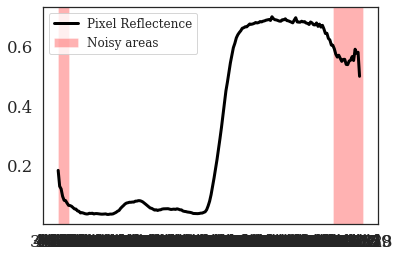

In [ ]:
x=pd.DataFrame([df.iloc[5].index,df.iloc[5].values]).T # create df from on row
#plot the values of row as function as the wavelengh
plt.plot(x[2:][x.columns[0]],x[2:][x.columns[1]],lw=3,color="black", label = "Pixel Reflectence")  # I only want the data from row 2 onwards
plt.axvspan(185, 205, facecolor='r', alpha=0.3, label = "Noisy areas")
plt.axvspan(0, 7, facecolor='r', alpha=0.3)
plt.legend(fontsize=12)

In [ ]:
# delete the noisy columns
noisy_wl = ['Unnamed: 0','397.32', '400.2', '403.09', '405.97', '408.85', '411.74',
            '938.88', '941.95', '945.02', '948.1', '951.17', '954.24', '957.32', '960.4',
            '963.47', '966.55', '969.63', '972.71', '975.79', '978.88', '981.96',
            '985.05', '988.13', '991.22', '994.31', '997.4', '1000.49', '1003.58']

# drop the coluns based on the list above:
df.drop(noisy_wl, axis=1, inplace=True)

Check if it works:

In [ ]:
df.columns[:6],df.columns[-1]

(Index(['wavelength', '414.63', '417.52', '420.4', '423.29', '426.19'], dtype='object'),
 '935.81')

Now we need to delete the unnecessary rows. We have 9 lines of headers that concated do the new df. 

We can see it by looking on all the values in *'wavelengh'* column:

In [ ]:
df['wavelength'].value_counts()['band']

11

So we have 11 values of string that we want to delete al their rows.

In [ ]:
# delete all the row that column wavelength contains the word "band"
df = df[df.wavelength != "band"]

# Check if works
df['wavelength'].value_counts()

5                819
1                682
2                678
4                675
8                658
3                639
9                636
6                589
7                583
12               552
11               549
10               515
16               365
18               354
17               328
Spathiphyllum    301
14               297
15               274
13               272
Monalisa         201
Tradescantia     200
Peperomia        200
Chlorophytum     200
Philodendron     199
Name: wavelength, dtype: int64

Done!

now we want to convert the type of wavelengh to int.

In [ ]:
print("Before\n",df.dtypes.unique())
# df = df.astype({"wavelength": int})
print("After\n",df.dtypes.unique())

Before
 [dtype('O') dtype('float64')]
After
 [dtype('O') dtype('float64')]


<center>

###**3. Convert the column of numbers to species name.**

<p align="justify">The column *'wavelengh'* contain values between 1-18. This numbers are represent a leaf number from my measurements while each number belong to specific species. i will convert the number to species name followed this table:


<center>
<font size="+1">

|<font size="+0.3"> **Leaf Number** 	| <font size="+0.3">**Species** 	|
|:---:	|:---:	|
| 1-3 	| Tradescantia 	|
| 4-6 	| Pepromia 	|
| 7-9 	| Spathiphyllum 	|
| 10-12 	| Philodendron 	|
| 13-15 	| Monalisa 	|
| 16-18 	| Chlorophytum 	|


In [ ]:
species_dict = {
            '1' : 'Tradescantia', '2' : 'Tradescantia','3' : 'Tradescantia',
            '4' : 'Peperomia', '5' : 'Peperomia', '6' : 'Peperomia',
            '7' : 'Spathiphyllum','8' : 'Spathiphyllum','9' : 'Spathiphyllum',
            '10' : 'Philodendron','11' : 'Philodendron','12' : 'Philodendron',
            '13' : 'Monalisa', '14' : 'Monalisa', '15' : 'Monalisa',
            '16' : 'Chlorophytum', '17' : 'Chlorophytum', '18' : 'Chlorophytum',
            }

# Replace values in column based on the dict:
df = df.replace({"wavelength": species_dict})
df['wavelength'].unique()

array(['Tradescantia', 'Peperomia', 'Spathiphyllum', 'Monalisa',
       'Philodendron', 'Chlorophytum'], dtype=object)

Now lets **change the column name** from *'wavelengh'* to *'Species'* so that we don't get confusedץ

In [ ]:
df.rename({'wavelength': 'Species'}, axis=1, inplace=True)

<center>

###**4.Create dict to convert band number to wavelengh and define the band as columns names**.

I will create array of wavelengh and array of bands and produce a dictionary to convert one from other

In [ ]:
wavelength = [ 414.63, 417.52, 420.4, 423.29, 426.19, 429.08, 431.97, 434.87, 437.76, 440.66, 443.56, 446.45, 449.35, 452.25, 455.16, 458.06, 460.96, 463.87, 466.77, 469.68, 472.59, 475.5, 478.41, 481.32, 484.23, 487.14, 490.06, 492.97, 495.89, 498.8, 501.72, 504.64, 507.56, 510.48, 513.4, 516.33, 519.25, 522.18, 525.1, 528.03, 530.96, 533.89, 536.82, 539.75, 542.68, 545.62, 548.55, 551.49, 554.43, 557.36, 560.3, 563.24, 566.18, 569.12, 572.07, 575.01, 577.96, 580.9, 583.85, 586.8, 589.75, 592.7, 595.65, 598.6, 601.55, 604.51, 607.46, 610.42, 613.38, 616.34, 619.3, 622.26, 625.22, 628.18, 631.15, 634.11, 637.08, 640.04, 643.01, 645.98, 648.95, 651.92, 654.89, 657.87, 660.84, 663.81, 666.79, 669.77, 672.75, 675.73, 678.71, 681.69, 684.67, 687.65, 690.64, 693.62, 696.61, 699.6, 702.58, 705.57, 708.57, 711.56, 714.55, 717.54, 720.54, 723.53, 726.53, 729.53, 732.53, 735.53, 738.53, 741.53, 744.53, 747.54, 750.54, 753.55, 756.56, 759.56, 762.57, 765.58, 768.6, 771.61, 774.62, 777.64, 780.65, 783.67, 786.68, 789.7, 792.72, 795.74, 798.77, 801.79, 804.81, 807.84, 810.86, 813.89, 816.92, 819.95, 822.98, 826.01, 829.04, 832.07, 835.11, 838.14, 841.18, 844.22, 847.25, 850.29, 853.33, 856.37, 859.42, 862.46, 865.5, 868.55, 871.6, 874.64, 877.69, 880.74, 883.79, 886.84, 889.9, 892.95, 896.01, 899.06, 902.12, 905.18, 908.24, 911.3, 914.36, 917.42, 920.48, 923.55, 926.61, 929.68, 932.74, 935.81]
bands = np.arange(0,len(wavelength),1)

# convert bands to wavelengh
bands_to_wl = dict(zip(bands, wavelength))
# convert wavelengh to bands:
wl_to_bands = dict(zip(wavelength, bands))

# bands_to_wl

In [ ]:
len(wavelength), len(bands)

(176, 176)

Save the new df after processing

In [ ]:
# df.to_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data_clean.csv")

<center>

###**5. Group the data and vizualization**

### **Visualization**

In [ ]:
# import seaborn for vizualization
palette =["deeppink","lime","Orange","red","forestgreen","cyan"]
sns.set_theme(style="white",font_scale = 1.5, palette=palette)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

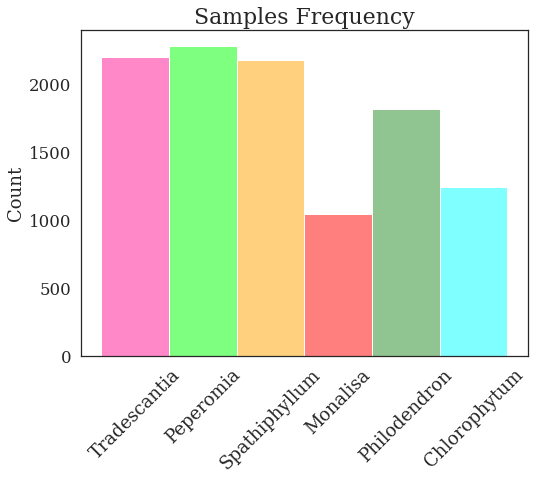

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.histplot(data=df, x="Species",hue="Species",legend = False)
ax.set_xlabel("")
ax.set_ylabel("Count")
ax.set_title("Samples Frequency",fontsize=22)
ax.xaxis.set_tick_params(labelsize=18, rotation=45)

In [ ]:
df.Species.value_counts()

Peperomia        2283
Tradescantia     2199
Spathiphyllum    2178
Philodendron     1815
Chlorophytum     1247
Monalisa         1044
Name: Species, dtype: int64

**Our data is not perfectly balanced**. We have twice as many samples of Sphatophylum as samples of Monalisa. The reason for this is that its leaves are larger and therefore it is more possible to tag more pixels.

Except for this, **the rest of the data are balanced**.

### **correlations**
 Lets look on the **correlations** between all the columns in the df with heat map. I will choose **Spearman correlation** because I want to check any monotonous correlation:

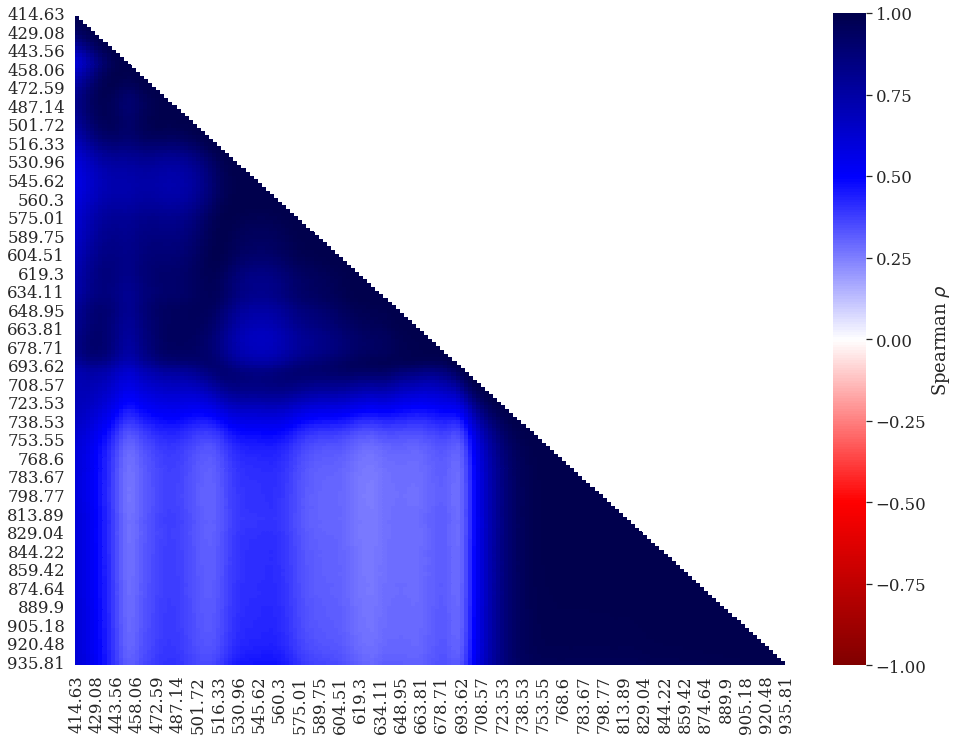

In [ ]:
# lets first visualizate all the parameters correlation:
spearman_corr = df.corr(method='spearman')
mask = np.zeros_like(spearman_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, figsize=(16,12))
ax = sns.heatmap(
                 spearman_corr,
                 cmap='seismic_r',
                 vmin=-1,
                 vmax=1,
                 mask=mask,
                 cbar_kws={'label': r'Spearman $\rho$'}
                )

* The **NIR bands are highly correlated** with each other. 

* The **visible light bands are also highly correlated** with each other, but less so than the NIR channels. 

* The **NIR and visible light channels are not highly correlated** with each other.

### **Clustermap**

Clustermap allows us to **see how each column in our df is distributed relative to its mean and standard deviation**. Any sample above the average is colored blue, any average sample is colored white and any sample below the average is colored red.

In addition, it is possible to show the aforementioned distribution with the column that we want to predict (the plants' species) and see if any trend can be seen with the eye.

clustermap by Species:


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


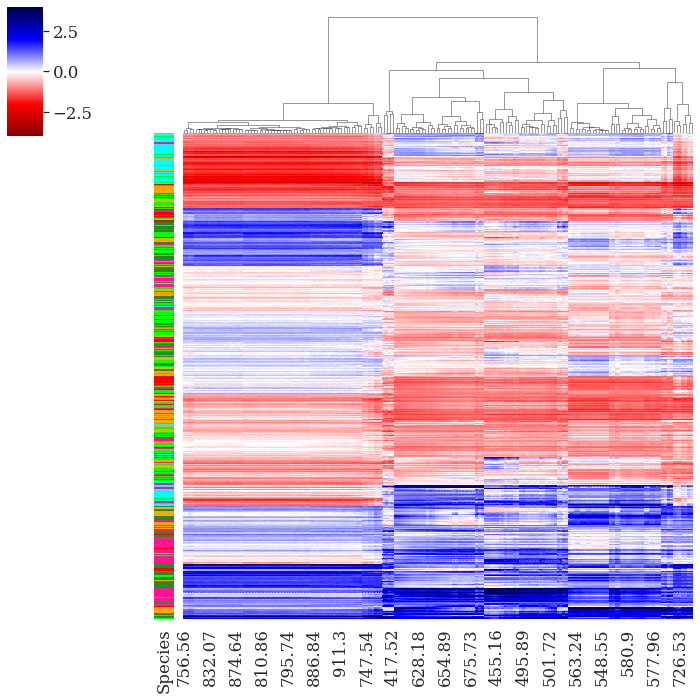

In [ ]:
# colors for every species:
labels_color = {'Tradescantia':"deeppink",
               'Peperomia':"lime",
               'Monalisa':"red",
               'Philodendron':"forestgreen",
               'Chlorophytum':"cyan",
               'Spathiphyllum':"Orange"}                  

# map the colors by values in column:
row_colors = df['Species'].map(labels_color)

# plot a clustermap :
print('clustermap by Species:')

cg = sns.clustermap(data = df[df.columns[1:]],
               z_score = True,
               cmap = 'seismic_r',
               vmin = -4,
               vmax = 4,
               row_colors = row_colors,
               yticklabels=False
              )
cg.ax_row_dendrogram.set_visible(False)
plt.show()

We can see clusters of part of the species but not a very sharp trend.

## Classification Models


####**<u>Unsupervized Learning</u>**:
1. *PCA* - in order to check if there is any trend and we can reduce data.

2. *K-means* - Check if we can classify the species.

####**<u>Supervized Learning</u>**:
3. *Logistic Regression*.

4. *Random Forest*

5. *Neural Network classification* (if needed).

### **1. PCA**

My goal is to produce a visualization based on "**Principal Component Analysis**" in order to check whether there are clusters in our data and whether it is possible to reduce the number of columns (features) with the  the model's output.

For that. i need to:
1. Standard the data.
2. Apply the model.
3. Visualization of the 2 PCA's.
4. Decide whether the model products can be used or not.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data_clean.csv", index_col="Unnamed: 0")
df

,Species,414.63,417.52,420.4,423.29,426.19,429.08,431.97,434.87,437.76,...,908.24,911.3,914.36,917.42,920.48,923.55,926.61,929.68,932.74,935.81
1,Tradescantia,0.074322,0.070541,0.066106,0.061432,0.056805,0.052832,0.052405,0.048077,0.047156,...,0.690270,0.695215,0.689560,0.683761,0.683432,0.686154,0.676282,0.657895,0.653666,0.654989
2,Tradescantia,0.081754,0.080618,0.072115,0.066773,0.063905,0.065511,0.061763,0.056366,0.054524,...,0.695364,0.692572,0.692308,0.692308,0.686391,0.689231,0.666667,0.664642,0.668111,0.647372
3,Tradescantia,0.078038,0.070541,0.072115,0.064103,0.059172,0.059172,0.052405,0.051393,0.047156,...,0.685176,0.684642,0.684066,0.686610,0.683432,0.670769,0.676282,0.661269,0.660888,0.643564
4,Tradescantia,0.074322,0.073900,0.069111,0.064103,0.061539,0.059172,0.054277,0.051393,0.047156,...,0.672440,0.674068,0.673077,0.666667,0.659763,0.664615,0.653846,0.651147,0.646443,0.639756
5,Tradescantia,0.074322,0.066890,0.066106,0.063881,0.059172,0.054795,0.054277,0.048077,0.047156,...,0.672119,0.671425,0.678246,0.666667,0.674191,0.664195,0.670284,0.657895,0.642831,0.643564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,Peperomia,0.055453,0.053030,0.049959,0.046173,0.046880,0.044288,0.046016,0.043210,0.042294,...,0.630259,0.639446,0.636262,0.632090,0.633376,0.621910,0.615714,0.606804,0.601310,0.580253
10773,Peperomia,0.047752,0.045770,0.040741,0.043457,0.037504,0.030125,0.034154,0.028855,0.030253,...,0.598889,0.600961,0.603197,0.597935,0.601201,0.594422,0.587076,0.572883,0.562337,0.563311
10774,Peperomia,0.051492,0.052812,0.047009,0.043457,0.039848,0.036235,0.034086,0.033128,0.029002,...,0.601741,0.603922,0.602286,0.603358,0.586951,0.584114,0.579916,0.572883,0.550287,0.540575
10775,Peperomia,0.063375,0.059854,0.062449,0.054494,0.053912,0.050327,0.044312,0.043210,0.037461,...,0.499074,0.494387,0.484918,0.482048,0.488889,0.487907,0.476104,0.471121,0.461920,0.448955


In [ ]:
# Apply Standardization (without the first column of the species):
z = df[df.columns[1:]].apply(lambda x:(x-x.mean())/x.std(), axis=0) 
# Apply PCA
pca = PCA().fit(z)
# Transformation
X_trans = pca.transform(z)

Visualization:

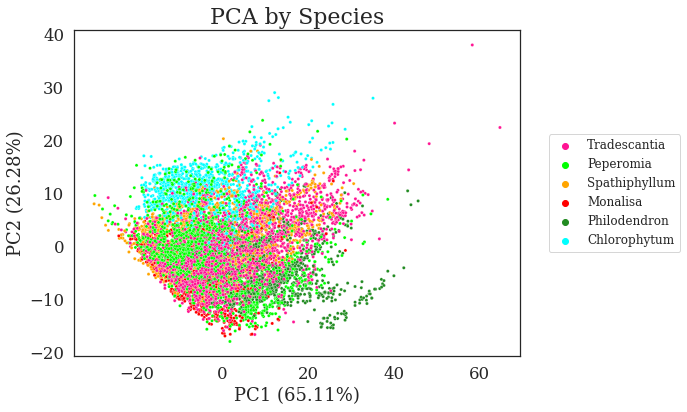

In [ ]:
color_var = 'Species'
colors = df[color_var] #colors by species

fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],s=10, hue=colors)
ax.set_xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))
ax.set_title("PCA by Species",fontsize=22)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5),fontsize=12)

We can see kinds of Clusters based on the species.

Lets plot the importence of explained variance for each of the principal components and try to reduce our data features:

In [ ]:
# Reformat and view results
PCA_df = pd.DataFrame((X_trans),
columns=['PC%s' % _ for _ in range(len(df.columns[1:]))])
PCA_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175
0,-5.218087,-0.887771,0.504034,-1.248602,-1.312151,-0.350048,0.050547,-0.123861,-0.036996,-0.351598,...,-0.000383,0.025818,-0.014136,0.003181,-0.004632,-0.008122,-0.016423,-0.024762,-0.017195,0.012084
1,-2.791936,0.984455,1.216565,-0.978007,-1.220540,-0.198852,0.152495,-0.035445,-0.085596,-0.311931,...,-0.017005,0.010505,0.010994,0.008453,0.004504,-0.003816,-0.008038,0.020671,-0.017707,-0.001512
2,-4.480235,-0.055871,0.810512,-1.207946,-1.280660,-0.262889,0.128283,-0.098419,-0.119160,-0.391001,...,0.013364,0.018056,0.015732,0.010101,0.013382,-0.012932,0.001669,0.012889,-0.005823,-0.009714
3,-4.345572,0.631827,0.844491,-2.163688,-1.309019,-0.736611,0.056274,-0.128743,0.239834,-0.241588,...,0.024286,0.004823,0.014806,-0.000716,-0.011390,0.005821,0.005609,-0.024538,-0.010580,0.004218
4,-4.744135,0.253109,0.672726,-1.973317,-1.309929,-0.779513,0.096545,-0.086374,0.090339,-0.323318,...,-0.005329,0.001840,-0.025050,-0.010673,-0.006133,0.005362,-0.003834,-0.020760,-0.016255,0.010594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10761,-11.107367,-1.415069,2.216709,1.257181,0.162284,-0.420415,0.139051,-0.008659,-0.077601,-0.159987,...,-0.007876,-0.002872,-0.007912,0.004998,-0.008618,-0.000260,-0.009110,-0.000991,0.001468,-0.006369
10762,-14.727460,-1.963647,1.735504,-0.062492,0.530938,-0.337169,0.236701,0.099404,-0.263352,-0.254204,...,0.005903,0.008659,0.009502,-0.003159,0.001405,0.007074,-0.017059,0.006235,0.010796,0.002753
10763,-14.696171,-1.958849,1.917560,-0.146424,0.295284,-0.076127,0.181966,-0.061881,-0.153004,-0.134236,...,-0.006269,-0.002391,-0.001290,0.001876,-0.003202,0.020652,0.003700,0.015968,-0.003648,0.020618
10764,-16.124392,3.578109,2.540030,0.166502,-0.720537,0.985102,-0.071784,-0.218478,-0.162048,-0.201240,...,-0.002063,0.018145,0.002476,0.024097,0.002617,-0.000303,-0.018341,-0.005422,0.010819,-0.000837


Text(0.5, 1.0, 'PCA')

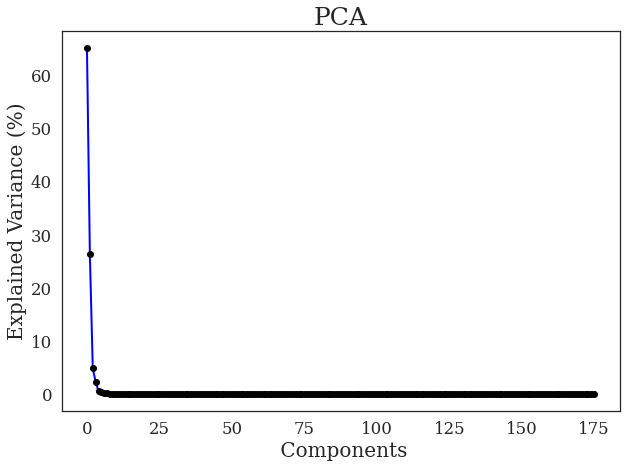

In [ ]:
# Graph
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(pca.explained_variance_ratio_*100, lw =2,color = "blue")
ax.plot(pca.explained_variance_ratio_*100,'o',lw = 8,color = "black")
ax.set_xlabel(" Components",fontsize=20)
ax.set_ylabel("Explained Variance (%)",fontsize=20)
ax.set_title("PCA",fontsize=25)

In [ ]:
pca.explained_variance_ratio_[:4]*100

array([65.10516466, 26.27718659,  4.86065625,  2.25420715])

As we can see, **the first 4 PC's responsible on 98.6 of the variance of the data**!


(176, 2)

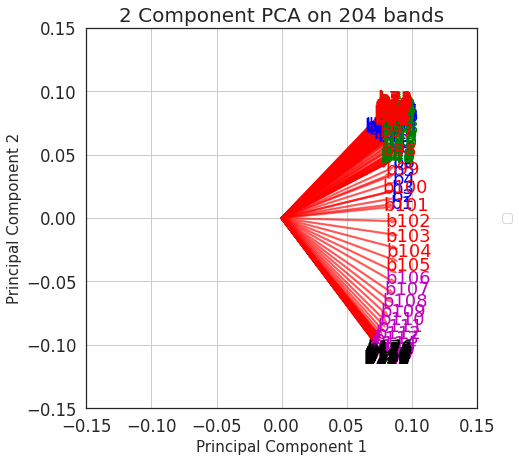

In [ ]:
data_scaled = pd.DataFrame(preprocessing.scale(df[df.columns[1:]]),columns =range(0,176) ) 
 

pca = PCA(n_components=2)
x_new = pca.fit_transform(data_scaled)
data_scaled['color']=None
data_scaled['label']=None
data_scaled.loc[:36,'color']='b'
data_scaled.loc[37:71,'color']='g'
data_scaled.loc[72:104,'color']='r'
data_scaled.loc[105:137,'color']='m'
data_scaled.loc[138:176,'color']='k'

c=data_scaled['color']
c=c.dropna()
l=['400-500nm','500-600nm','600-700nm','700-800nm','800-1000nm']
data_scaled.loc[:36,'label']=l[0]
data_scaled.loc[37:71,'label']=l[1]
data_scaled.loc[72:104,'label']=l[2]
data_scaled.loc[105:137,'label']=l[3]
data_scaled.loc[138:,'label']=l[4]

def myplot(score,coeff,color,legend,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    #plt.scatter(xs * scalex,ys * scaley, c = y)
    for i,c,label in zip(range(n),color,legend):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "b"+str(i+1), color = c, ha = 'center', va = 'center')

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set(xlim=[-0.15,0.15],ylim=[-0.15,0.15])

ax.grid()
legend1={'b':'400-500nm','g':'500-600nm','r':'600-700nm','m':'700-800nm','b':'800-1000nm'}

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),c,data_scaled['label'][0:204])


# ax.title('2 component PCA grid on 204 wavelengths')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA on 204 bands', fontsize = 20)
plt.legend(legend1,loc=6, bbox_to_anchor=(1.05, 0.5),fontsize=12)
np.transpose(pca.components_[0:2, :]).shape

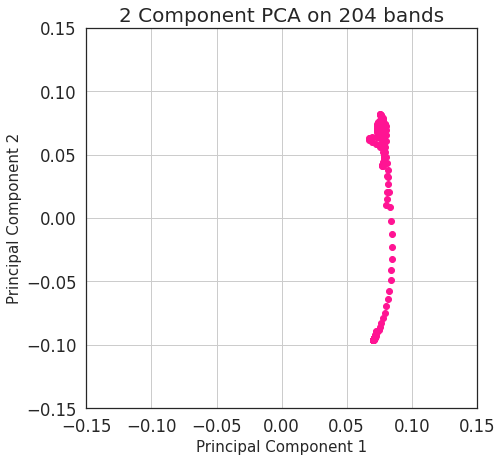

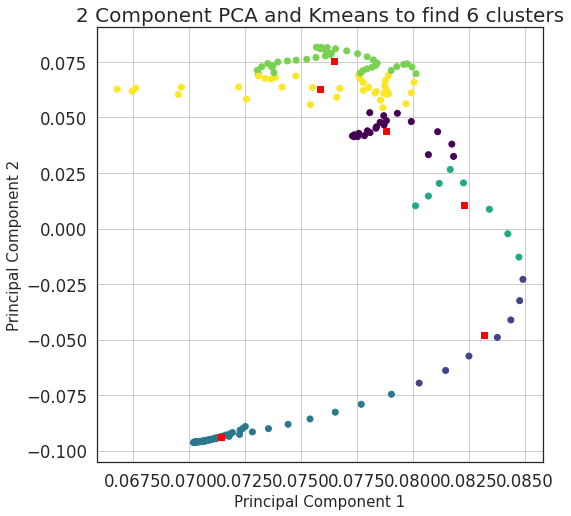

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.scatter(np.transpose(pca.components_[0, :]),np.transpose(pca.components_[1, :]))
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA on 204 bands', fontsize = 20)
ax.set(xlim=[-0.15,0.15],ylim=[-0.15,0.15])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels
n=6
centers, labels = find_clusters(np.transpose(pca.components_[0:2, :]), n)
ax.scatter(np.transpose(pca.components_[0, :]),np.transpose(pca.components_[1, :]), c=labels,
             cmap='viridis');
ax.grid()
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA and Kmeans to find '+str(n)+' clusters', fontsize = 20)

ax.scatter(centers[:,0],centers[:,1], c='r', marker=',')

In [ ]:
Kmeans_df = PCA_df[PCA_df.columns[:4]]
Kmeans_df

,PC0,PC1,PC2,PC3
0,-5.218087,-0.887771,0.504034,-1.248602
1,-2.791936,0.984455,1.216565,-0.978007
2,-4.480235,-0.055871,0.810512,-1.207946
3,-4.345572,0.631827,0.844491,-2.163688
4,-4.744135,0.253109,0.672726,-1.973317
...,...,...,...,...
10761,-11.107367,-1.415069,2.216709,1.257181
10762,-14.727460,-1.963647,1.735504,-0.062492
10763,-14.696171,-1.958849,1.917560,-0.146424
10764,-16.124392,3.578109,2.540030,0.166502


### **2. K-means**

Apply the model on the 4 PC that we produce.


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=6) #define the model with 6 species (outputs)
kmeans.fit(Kmeans_df) # fit on data
clusters_kmeans = kmeans.predict(Kmeans_df) #predict array 
len(clusters_kmeans)
# clusters_kmeans

9048

Plot the results

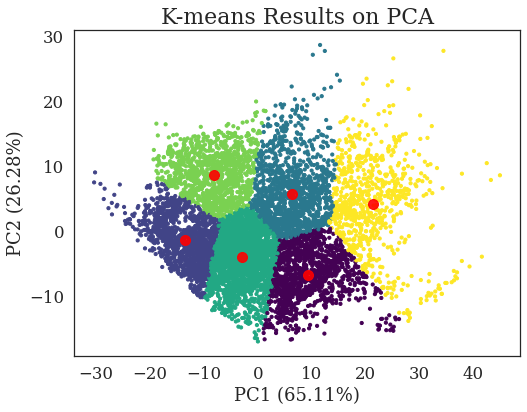

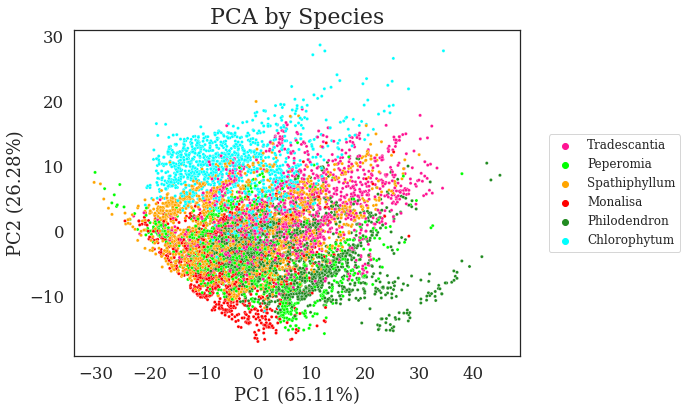

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.scatter(Kmeans_df["PC0"], 
            Kmeans_df['PC1'], 
            c=clusters_kmeans, 
            s=10, 
            cmap='viridis')
# center of blob
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], 
            centers[:, 1], 
            c='red', 
            s=100, 
            alpha=0.9)
ax.set_xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))
ax.set_title("K-means Results on PCA",fontsize=22)

# PCA results graph
fig, ax = plt.subplots(1, figsize=(8,6))
ax = sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],s=10, hue=colors)
ax.set_xlabel('PC1 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 ({:.2f}%)'.format(100*pca.explained_variance_ratio_[1]))
ax.set_title("PCA by Species",fontsize=22)
plt.legend(loc=6, bbox_to_anchor=(1.05, 0.5),fontsize=12)

### **Supervized Learning models preprocessing**

1. **Define features and labels** and shuffle the data.

2. **Split the data** into train, validation, and test (70%, 15%, 15% respectively).
3. Standardization (Logistic Regression)
3. train the model and tune the hyperparameters.

4. evalute on test set and confusion matrix

5. Save the model.

### **Logistic Regression**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data_clean.csv", index_col="Unnamed: 0")
df

,Species,414.63,417.52,420.4,423.29,426.19,429.08,431.97,434.87,437.76,...,908.24,911.3,914.36,917.42,920.48,923.55,926.61,929.68,932.74,935.81
1,Tradescantia,0.074322,0.070541,0.066106,0.061432,0.056805,0.052832,0.052405,0.048077,0.047156,...,0.690270,0.695215,0.689560,0.683761,0.683432,0.686154,0.676282,0.657895,0.653666,0.654989
2,Tradescantia,0.081754,0.080618,0.072115,0.066773,0.063905,0.065511,0.061763,0.056366,0.054524,...,0.695364,0.692572,0.692308,0.692308,0.686391,0.689231,0.666667,0.664642,0.668111,0.647372
3,Tradescantia,0.078038,0.070541,0.072115,0.064103,0.059172,0.059172,0.052405,0.051393,0.047156,...,0.685176,0.684642,0.684066,0.686610,0.683432,0.670769,0.676282,0.661269,0.660888,0.643564
4,Tradescantia,0.074322,0.073900,0.069111,0.064103,0.061539,0.059172,0.054277,0.051393,0.047156,...,0.672440,0.674068,0.673077,0.666667,0.659763,0.664615,0.653846,0.651147,0.646443,0.639756
5,Tradescantia,0.074322,0.066890,0.066106,0.063881,0.059172,0.054795,0.054277,0.048077,0.047156,...,0.672119,0.671425,0.678246,0.666667,0.674191,0.664195,0.670284,0.657895,0.642831,0.643564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,Peperomia,0.055453,0.053030,0.049959,0.046173,0.046880,0.044288,0.046016,0.043210,0.042294,...,0.630259,0.639446,0.636262,0.632090,0.633376,0.621910,0.615714,0.606804,0.601310,0.580253
10773,Peperomia,0.047752,0.045770,0.040741,0.043457,0.037504,0.030125,0.034154,0.028855,0.030253,...,0.598889,0.600961,0.603197,0.597935,0.601201,0.594422,0.587076,0.572883,0.562337,0.563311
10774,Peperomia,0.051492,0.052812,0.047009,0.043457,0.039848,0.036235,0.034086,0.033128,0.029002,...,0.601741,0.603922,0.602286,0.603358,0.586951,0.584114,0.579916,0.572883,0.550287,0.540575
10775,Peperomia,0.063375,0.059854,0.062449,0.054494,0.053912,0.050327,0.044312,0.043210,0.037461,...,0.499074,0.494387,0.484918,0.482048,0.488889,0.487907,0.476104,0.471121,0.461920,0.448955


In [ ]:
# Define features and labels:
df = df.sample(frac=1) # Shuffle the data 
X = df.drop('Species', axis='columns') #All column except of the Species column
X = (X-X.mean())/X.std() #standardization
Y = df.Species

In [ ]:
# Split the data into train , validation, and test
train_ratio = 0.7
test_ratio = 0.3
val_ratio =0.5 # 0.5 of 30% = 15%
# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=1 - train_ratio)
# Split to validation and test:
x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=val_ratio) 

print("x train length: ",len(x_train),
      "\n","x validation length: ", len(x_val),
      "\n","x test length: ", len(x_test))

x train length:  7536 
 x validation length:  1615 
 x test length:  1615


I changed the hyperparameter *C* from 1 to 10.  A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. Basically, a **high C means "Trust this training data a lot"**, while a **low value says "This data may not be fully representative of the real world data**, so if it's telling you to make a parameter really large, don't listen to it".

Since i shuffled the data we can give high score of C. 

In [ ]:
# define the model for multiclass classification:
logreg = LogisticRegression(multi_class='multinomial',C=10, solver='lbfgs')
# Fit the model on the train set:
logreg.fit(x_train,y_train)

# -------- Validation-----------------#
y_val_pred = logreg.predict(x_val)

print("Validation: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))
print("Validation: Precision:",metrics.precision_score(y_val, y_val_pred,average='weighted'))
print("Validation: Recall:",metrics.recall_score(y_val, y_val_pred,average='weighted'))
print("Validation: f1:",metrics.f1_score(y_val, y_val_pred,average='weighted'))

# -------- Test-----------------#
y_test_pred = logreg.predict(x_test)

print("Test: Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Test: Precision:",metrics.precision_score(y_test, y_test_pred,average='weighted'))
print("Test: Recall:",metrics.recall_score(y_test, y_test_pred,average='weighted'))
print("Test: f1:",metrics.f1_score(y_test, y_test_pred,average='weighted'))

Validation: Accuracy: 0.8185758513931889
Validation: Precision: 0.8200045034867076
Validation: Recall: 0.8185758513931889
Validation: f1: 0.8167150459081609
Test: Accuracy: 0.8371517027863777
Test: Precision: 0.8366934694718332
Test: Recall: 0.8371517027863777
Test: f1: 0.8358382285241497


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 1.0, 'Logistic Regression')

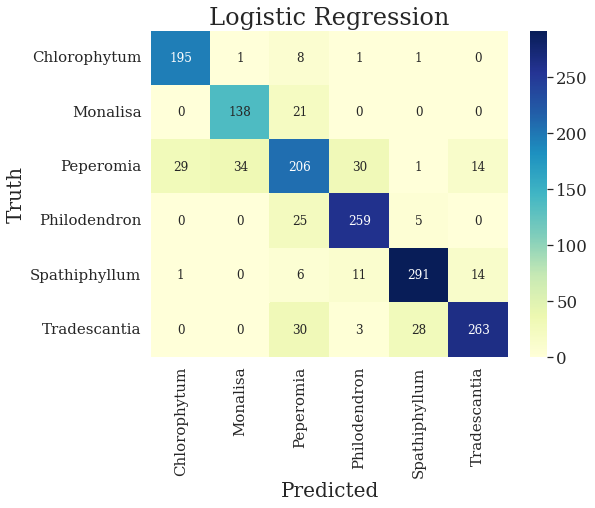

In [ ]:
# labels to confiusion matrix:
unique_label = np.unique([y_test, y_test_pred])
# le.inverse_transform(np.unique(y_test_pred)),le.inverse_transform(np.unique(y_test))
# df of confiusion matrix:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label])
plt.figure(figsize = (8,6))
sns.heatmap(cmtx, annot=True, fmt='d',annot_kws={"size": 12},cmap="YlGnBu")
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.xticks(fontsize =15,rotation=90)
plt.yticks(fontsize =15,rotation=0)
plt.title('Logistic Regression', fontsize = 24)

In [ ]:
f1 = f1_score(y_test, y_test_pred, average=None) #f1 score to each label
# df with f1 score
df_score =pd.DataFrame(index = np.unique([y_val])) 
df_score['F1_Log_reg'] = f1
df_score

,F1_Log_reg
Chlorophytum,0.904872
Monalisa,0.831325
Peperomia,0.675410
Philodendron,0.873524
Spathiphyllum,0.896764
Tradescantia,0.855285


5. Save the model

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/Models/Logistic_Reg", "wb") as f:
#   pickle.dump(logreg,f)

In [ ]:
# # If you want to load the model and predict new data:
# with open("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/Models/Logistic_Reg", "rb") as f:
#   loded_model = pickle.load(f) #load the model

# # To predict you have to input an array with the bands:
# # for example:
# rand_sample = X.iloc[3:5].to_numpy()
# loded_model.predict(rand_sample)

### **Random Forest**

1. **Define features and labels** and shuffle the data.

2. **Split the data** into train, validation, and test (70%, 15%, 15% respectively).

3. train the model and tune the hyperparameters.

4. evalute on test set and confusion matrix.

5. Perform "**Feature Importence**" to check which band is more affect on the results.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data_clean.csv", index_col="Unnamed: 0")
df

,Species,414.63,417.52,420.4,423.29,426.19,429.08,431.97,434.87,437.76,...,908.24,911.3,914.36,917.42,920.48,923.55,926.61,929.68,932.74,935.81
1,Tradescantia,0.074322,0.070541,0.066106,0.061432,0.056805,0.052832,0.052405,0.048077,0.047156,...,0.690270,0.695215,0.689560,0.683761,0.683432,0.686154,0.676282,0.657895,0.653666,0.654989
2,Tradescantia,0.081754,0.080618,0.072115,0.066773,0.063905,0.065511,0.061763,0.056366,0.054524,...,0.695364,0.692572,0.692308,0.692308,0.686391,0.689231,0.666667,0.664642,0.668111,0.647372
3,Tradescantia,0.078038,0.070541,0.072115,0.064103,0.059172,0.059172,0.052405,0.051393,0.047156,...,0.685176,0.684642,0.684066,0.686610,0.683432,0.670769,0.676282,0.661269,0.660888,0.643564
4,Tradescantia,0.074322,0.073900,0.069111,0.064103,0.061539,0.059172,0.054277,0.051393,0.047156,...,0.672440,0.674068,0.673077,0.666667,0.659763,0.664615,0.653846,0.651147,0.646443,0.639756
5,Tradescantia,0.074322,0.066890,0.066106,0.063881,0.059172,0.054795,0.054277,0.048077,0.047156,...,0.672119,0.671425,0.678246,0.666667,0.674191,0.664195,0.670284,0.657895,0.642831,0.643564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,Peperomia,0.055453,0.053030,0.049959,0.046173,0.046880,0.044288,0.046016,0.043210,0.042294,...,0.630259,0.639446,0.636262,0.632090,0.633376,0.621910,0.615714,0.606804,0.601310,0.580253
10773,Peperomia,0.047752,0.045770,0.040741,0.043457,0.037504,0.030125,0.034154,0.028855,0.030253,...,0.598889,0.600961,0.603197,0.597935,0.601201,0.594422,0.587076,0.572883,0.562337,0.563311
10774,Peperomia,0.051492,0.052812,0.047009,0.043457,0.039848,0.036235,0.034086,0.033128,0.029002,...,0.601741,0.603922,0.602286,0.603358,0.586951,0.584114,0.579916,0.572883,0.550287,0.540575
10775,Peperomia,0.063375,0.059854,0.062449,0.054494,0.053912,0.050327,0.044312,0.043210,0.037461,...,0.499074,0.494387,0.484918,0.482048,0.488889,0.487907,0.476104,0.471121,0.461920,0.448955


In [ ]:
# Define features and labels:
df = df.sample(frac=1) # Shuffle the data 
X = df.drop('Species', axis='columns') #All column except of the Species column
Y = df.Species

In [ ]:
# Split the data into train , validation, and test
train_ratio = 0.7
test_ratio = 0.3
val_ratio =0.5 # 0.5 of 30% = 15%
# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=1 - train_ratio)
# Split to validation and test:
x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=val_ratio) 

print("x train length: ",len(x_train),
      "\n","x validation length: ", len(x_val),
      "\n","x test length: ", len(x_test))

x train length:  7536 
 x validation length:  1615 
 x test length:  1615


In [ ]:
# define the model for multiclass classification:
clf = RandomForestClassifier() # Set the arguments of the classifier

# -------- train-----------------#
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)

print("Training: Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Training: Accuracy: 0.9996019108280255


I will evaluate the model based on *weighted average* of the matrix. This is the most appropriate way when our data is not balanced (there is not an equal amount of samples for the different classes). For more info [here](https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f)

In [ ]:
# -------- Validation-----------------#
y_val_pred = clf.predict(x_val)

print("Validation: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))
print("Validation: Precision:",metrics.precision_score(y_val, y_val_pred,average='weighted'))
print("Validation: Recall:",metrics.recall_score(y_val, y_val_pred,average='weighted'))
print("Validation: f1:",metrics.f1_score(y_val, y_val_pred,average='weighted'))

# -------- Test-----------------#
y_test_pred = clf.predict(x_test)

print("Test: Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Test: Precision:",metrics.precision_score(y_test, y_test_pred,average='weighted'))
print("Test: Recall:",metrics.recall_score(y_test, y_test_pred,average='weighted'))
print("Test: f1:",metrics.f1_score(y_test, y_test_pred,average='weighted'))

Validation: Accuracy: 0.8396284829721362
Validation: Precision: 0.8393149396221451
Validation: Recall: 0.8396284829721362
Validation: f1: 0.839103460255121
Test: Accuracy: 0.8414860681114551
Test: Precision: 0.8408304137213036
Test: Recall: 0.8414860681114551
Test: f1: 0.8407374008227841


Text(0.5, 1.0, 'Random Forest')

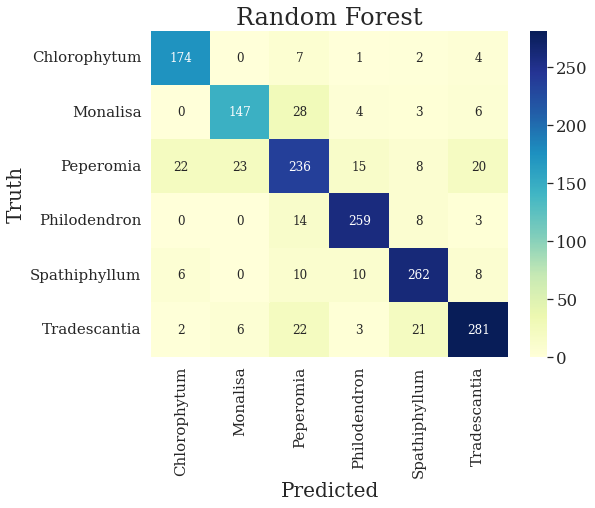

In [ ]:
# labels to confiusion matrix:
unique_label = np.unique([y_test, y_test_pred])
# df of confiusion matrix:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, y_test_pred, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label])
plt.figure(figsize = (8,6))
sns.heatmap(cmtx, annot=True, fmt='d',annot_kws={"size": 12},cmap="YlGnBu")
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.xticks(fontsize =15,rotation=90)
plt.yticks(fontsize =15,rotation=0)
plt.title('Random Forest', fontsize = 24)

In [ ]:
f1 = f1_score(y_test, y_test_pred, average=None) #f1 score to each label
# df with f1 score
# df_score_rf =pd.DataFrame(index = np.unique([y_val])) 
df_score['F1_Score_RF'] = f1
df_score

,F1_Log_reg,F1_Score_RF
Chlorophytum,0.904872,0.887755
Monalisa,0.831325,0.807692
Peperomia,0.675410,0.736349
Philodendron,0.873524,0.899306
Spathiphyllum,0.896764,0.873333
Tradescantia,0.855285,0.855403


**Save the model**

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/Models/RF", "wb") as f:
#   pickle.dump(clf,f)

**Feature Importance:**

I will use the *Permutation importance* method, which **more suitable for a large number of features**.

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time() #time calculation
result = permutation_importance(
    clf, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2
) 
elapsed_time = time.time() - start_time # Final time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.DataFrame(result.importances_mean, index=X.columns) #Series of results

Elapsed time to compute the importances: 135.349 seconds


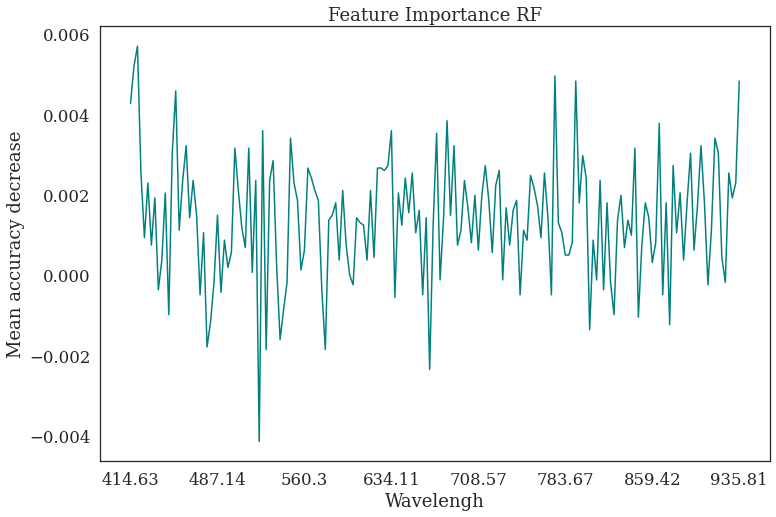

In [ ]:
from matplotlib.pylab import title
forest_importances[forest_importances.columns[0]].plot(color = "teal",
                                                       figsize=(12, 8),
                                                       xlabel = "Wavelengh",
                                                       ylabel= "Mean accuracy decrease",
                                                       title = "Feature Importance RF")

In [ ]:
# forest_importances.idxmax()
forest_importances.nlargest(10,forest_importances.columns[0]) # top 10

,0
420.4,0.005697
417.52,0.005201
774.62,0.004954
792.72,0.004830
935.81,0.004830
452.25,0.004582
414.63,0.004272
681.69,0.003839
865.5,0.003777
634.11,0.003591


The wavelength that most affected the result of the model is 693 

### **Neural Network Classification**

For the purpose of building the model I will use  *PyTorch* library adapted to create neural networks.

Based on [this](https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab) tutorial

1. Read the data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data_clean.csv", index_col="Unnamed: 0")
df = df.sample(frac=1) # Shuffle the data 
df.head(5)

,Species,414.63,417.52,420.4,423.29,426.19,429.08,431.97,434.87,437.76,...,908.24,911.3,914.36,917.42,920.48,923.55,926.61,929.68,932.74,935.81
8483,Monalisa,0.072739,0.071296,0.068775,0.065070,0.071122,0.068734,0.072715,0.074166,0.080032,...,0.815294,0.826775,0.814815,0.810674,0.806085,0.807013,0.801687,0.788975,0.773905,0.773002
927,Philodendron,0.078491,0.076825,0.076939,0.072871,0.070320,0.066904,0.062475,0.066379,0.067347,...,0.770000,0.775704,0.766744,0.787850,0.782404,0.772653,0.772425,0.768180,0.753983,0.757310
5909,Peperomia,0.059245,0.048165,0.052923,0.052011,0.049775,0.049107,0.048820,0.054884,0.054769,...,0.611816,0.623482,0.620253,0.618996,0.617647,0.598467,0.604779,0.589378,0.589779,0.574855
6486,Peperomia,0.073864,0.065374,0.057741,0.057566,0.052830,0.044872,0.039773,0.035156,0.035582,...,0.800847,0.805310,0.799087,0.800355,0.780172,0.789304,0.786569,0.795904,0.764307,0.774682
1695,Philodendron,0.102345,0.095865,0.079426,0.077401,0.073892,0.066015,0.063362,0.052928,0.051355,...,0.879234,0.857143,0.896679,0.883315,0.903061,0.881936,0.871858,0.882468,0.869565,0.883516


Convert the Labels to numbers with dictionary and create input and output data

In [ ]:
labels_dict = {
    'Tradescantia':0,
    'Peperomia':1,
    'Spathiphyllum':2,
    'Monalisa':3,
    'Philodendron':4,
    'Chlorophytum':5
    }
# If you want to replace keys and values:
# labels_dict = {v: k for k, v in labels_dict.items()}

X = df.drop('Species', axis='columns') #All column except of the Species column
X = (X-X.mean())/X.std() #standardization
Y = df['Species'].replace(labels_dict)

**Train — Validation — Test** (70-15-15)

In [ ]:
# Split the data into train , validation, and test
train_ratio = 0.7
test_ratio = 0.3
val_ratio =0.5 # 0.5 of 30% = 15%
# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=1 - train_ratio)
# Split to validation and test:
x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=val_ratio) 

print("x train length: ",len(x_train),
      "\n","x validation length: ", len(x_val),
      "\n","x test length: ", len(x_test))

x train length:  7536 
 x validation length:  1615 
 x test length:  1615


Convert to Numpy array

In [ ]:
X_train, y_train = np.array(x_train), np.array(y_train)
X_val, y_val = np.array(x_val), np.array(y_val)
X_test, y_test = np.array(x_test), np.array(y_test)

Define a **custom dataset**. This dataset will be used by the dataloader to pass our data into our model.

In [ ]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

**Hyperparameters**

In [ ]:
EPOCHS = 13
BATCH_SIZE = 16
LEARNING_RATE = 0.0001
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 6

**Dataloader**
Let’s now initialize our dataloaders.

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

**Define Neural Net Architecture**

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 1000) #input = num_feature, output=512
        self.layer_2 = nn.Linear(1000, 1000)
        self.layer_3 = nn.Linear(1000,512)
        self.layer_out = nn.Linear(512, num_class) 
        
        self.relu = nn.ReLU() #Relu activation function
        self.dropout = nn.Dropout(p=0.2) #Dropout for avoid overfit
        self.batchnorm1 = nn.BatchNorm1d(1000) # Batch normalization
        self.batchnorm2 = nn.BatchNorm1d(1000)
        self.batchnorm3 = nn.BatchNorm1d(512)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

GPU activation check

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

Loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=176, out_features=1000, bias=True)
  (layer_2): Linear(in_features=1000, out_features=1000, bias=True)
  (layer_3): Linear(in_features=1000, out_features=512, bias=True)
  (layer_out): Linear(in_features=512, out_features=6, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
print(summary(model))

Layer (type:depth-idx)                   Param #
MulticlassClassification                 --
├─Linear: 1-1                            177,000
├─Linear: 1-2                            1,001,000
├─Linear: 1-3                            512,512
├─Linear: 1-4                            3,078
├─ReLU: 1-5                              --
├─Dropout: 1-6                           --
├─BatchNorm1d: 1-7                       2,000
├─BatchNorm1d: 1-8                       2,000
├─BatchNorm1d: 1-9                       1,024
Total params: 1,698,614
Trainable params: 1,698,614
Non-trainable params: 0


**Train the model**

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

We’ll also define 2 dictionaries which will store the accuracy/epoch and loss/epoch for both train and validation sets.

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

We’re using tqdm to enable progress bars for training and testing loops.

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = Loss(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = Loss(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:02}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


  0%|          | 0/13 [00:00<?, ?it/s]

Epoch 01: | Train Loss: 0.83737 | Val Loss: 0.48097 | Train Acc: 70.773| Val Acc: 85.077
Epoch 02: | Train Loss: 0.57874 | Val Loss: 0.41674 | Train Acc: 79.501| Val Acc: 86.749
Epoch 03: | Train Loss: 0.50636 | Val Loss: 0.36632 | Train Acc: 81.894| Val Acc: 88.731
Epoch 04: | Train Loss: 0.46357 | Val Loss: 0.34118 | Train Acc: 83.202| Val Acc: 88.978
Epoch 05: | Train Loss: 0.42904 | Val Loss: 0.33249 | Train Acc: 84.435| Val Acc: 88.669
Epoch 06: | Train Loss: 0.40134 | Val Loss: 0.33068 | Train Acc: 85.575| Val Acc: 88.483
Epoch 07: | Train Loss: 0.38247 | Val Loss: 0.31136 | Train Acc: 86.074| Val Acc: 89.598
Epoch 08: | Train Loss: 0.36170 | Val Loss: 0.32646 | Train Acc: 86.155| Val Acc: 89.226
Epoch 09: | Train Loss: 0.34358 | Val Loss: 0.31886 | Train Acc: 87.327| Val Acc: 89.040
Epoch 10: | Train Loss: 0.33081 | Val Loss: 0.30598 | Train Acc: 87.476| Val Acc: 89.164
Epoch 11: | Train Loss: 0.32058 | Val Loss: 0.32034 | Train Acc: 87.917| Val Acc: 88.173
Epoch 12: | Train Los

**Visualize Loss and Accuracy**

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

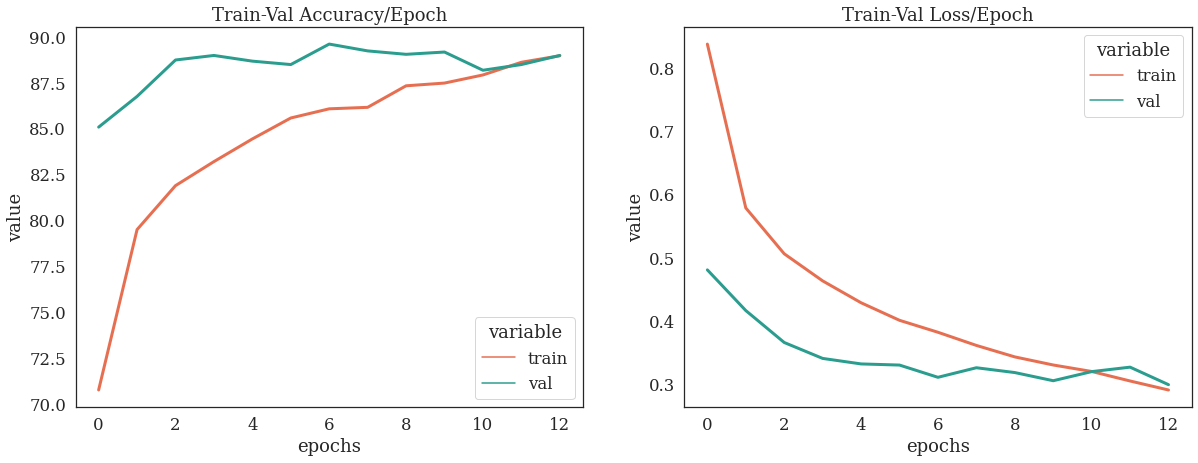

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",
             ax=axes[0],palette = ['#e76f51','#2a9d8f'],linewidth = 3).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable",
             ax=axes[1],palette = ['#e76f51','#2a9d8f'],linewidth = 3).set_title('Train-Val Loss/Epoch')

**Eval on the test set**

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
print("Test: Accuracy:",metrics.accuracy_score(y_test, y_pred_list))
print("Test: Precision:",metrics.precision_score(y_test, y_pred_list,average='weighted'))
print("Test: Recall:",metrics.recall_score(y_test, y_pred_list,average='weighted'))
print("Test: f1:",metrics.f1_score(y_test, y_pred_list,average='weighted'))

Test: Accuracy: 0.874922600619195
Test: Precision: 0.8758874429957187
Test: Recall: 0.874922600619195
Test: f1: 0.8726735983011055


Save the model:

In [ ]:
# torch.save(model.state_dict(), "/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/Models/ANN_90%")

**Confusion matrix**

In [ ]:
labels_dict = {v: k for k, v in labels_dict.items()}
map(lambda x: labels_dict[x], y_test_pred)
# a

convert list array and convert to species name:

In [ ]:
y_pred_arr = np.array(y_pred_list)
y_test_arr = np.array(y_test)

convert_dict = {    0:'Tradescantia',
 1:'Pepromia',
 2:'Spathiphyllum',
 3:'Monalisa',
 4:'Philodendron',
 5:'Chlorophytum'}

#  Convert values to species name
y_pred_labels = [convert_dict[pixel] for pixel in y_pred_arr]
y_test_labels = [convert_dict[pixel] for pixel in y_test_arr]

Text(0.5, 1.0, 'Nueral Network')

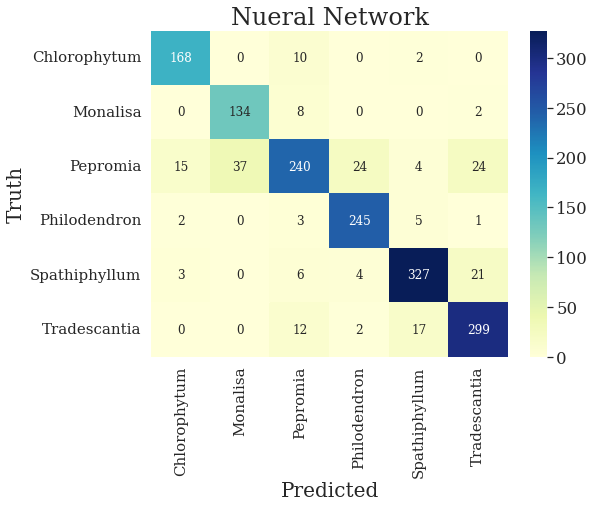

In [ ]:
# labels to confiusion matrix:
unique_label = np.unique([y_test_labels, y_pred_labels])

cmtx = pd.DataFrame(
    confusion_matrix(y_test_labels, y_pred_labels, labels=unique_label), 
    index=[x for x in unique_label], 
    columns=[x for x in unique_label])
plt.figure(figsize = (8,6))
sns.heatmap(cmtx, annot=True, fmt='d',annot_kws={"size": 12},cmap="YlGnBu")
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Truth', fontsize = 20)
plt.xticks(fontsize =15,rotation=90)
plt.yticks(fontsize =15,rotation=0)
plt.title('Nueral Network', fontsize = 24)

### **Summary Results**

In [ ]:
f1 = f1_score(y_test_labels, y_pred_labels, average=None) #f1 score to each label
# df with f1 score
# df_score_rf =pd.DataFrame(index = np.unique([y_val])) 
df_score['ANN'] = f1
df_score

,F1_Log_reg,F1_Score_RF,ANN
Chlorophytum,0.904872,0.887755,0.913043
Monalisa,0.831325,0.807692,0.850794
Peperomia,0.675410,0.736349,0.770465
Philodendron,0.873524,0.899306,0.922787
Spathiphyllum,0.896764,0.873333,0.913408
Tradescantia,0.855285,0.855403,0.883309


In [ ]:
df_score.index.values

array(['Chlorophytum', 'Monalisa', 'Peperomia', 'Philodendron',
       'Spathiphyllum', 'Tradescantia'], dtype=object)

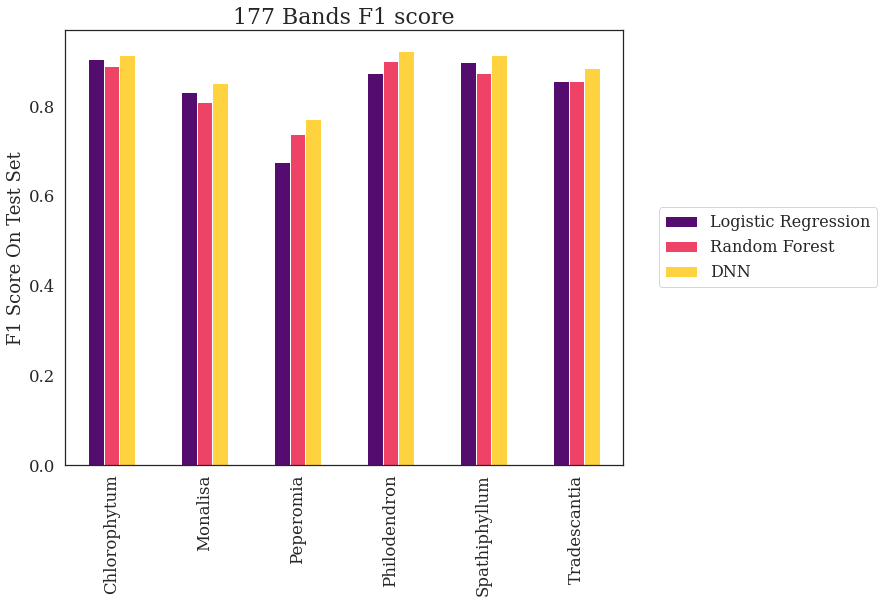

In [ ]:
, ylim
palette = ["#540d6e","#ee4266","#ffd23f"]
ax = df_score.plot.bar(figsize=(10,8),color=palette)
ax.set_ylabel("F1 Score On Test Set")
ax.set_title("177 Bands F1 score", fontsize=22)
ax.set_ylim
plt.legend(['Logistic Regression', 'Random Forest', 'DNN'],loc=6, bbox_to_anchor=(1.05, 0.5),fontsize=16)

# Draft

In [ ]:
# apply on PCA 4 first:
df = pd.read_csv("/content/drive/MyDrive/Greenwall/Hyperspectral_data/All_data/All_data_clean.csv", index_col="Unnamed: 0")
Y = df.Species
X = Kmeans_df #All column except of the Species column

In [ ]:
# Split the data into train , validation, and test
train_ratio = 0.7
test_ratio = 0.3
val_ratio =0.5 # 0.5 of 30% = 15%
# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=1 - train_ratio)
# Split to validation and test:
x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=val_ratio) 

print("x train length: ",len(x_train),
      "\n","x validation length: ", len(x_val),
      "\n","x test length: ", len(x_test))

x train length:  7536 
 x validation length:  1615 
 x test length:  1615


In [ ]:
# define the model for multiclass classification:
logreg = LogisticRegression(multi_class='multinomial',C=10, solver='lbfgs')
# Fit the model on the train set:
logreg.fit(x_train,y_train)

# -------- Validation-----------------#
y_val_pred = logreg.predict(x_val)

print("Validation: Accuracy:",metrics.accuracy_score(y_val, y_val_pred))
print("Validation: Precision:",metrics.precision_score(y_val, y_val_pred,average='weighted'))
print("Validation: Recall:",metrics.recall_score(y_val, y_val_pred,average='weighted'))
print("Validation: f1:",metrics.f1_score(y_val, y_val_pred,average='weighted'))

# -------- Test-----------------#
y_test_pred = logreg.predict(x_test)

print("Test: Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Test: Precision:",metrics.precision_score(y_test, y_test_pred,average='weighted'))
print("Test: Recall:",metrics.recall_score(y_test, y_test_pred,average='weighted'))
print("Test: f1:",metrics.f1_score(y_test, y_test_pred,average='weighted'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Validation: Accuracy: 0.5275541795665635
Validation: Precision: 0.52540734263395
Validation: Recall: 0.5275541795665635
Validation: f1: 0.5248624394776991
Test: Accuracy: 0.5256965944272446
Test: Precision: 0.5191875958620654
Test: Recall: 0.5256965944272446
Test: f1: 0.5189613784668431
